<a href="https://colab.research.google.com/github/bork0047/Data-Analysis/blob/main/Deep%20Learning%20with%20Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning with Keras

In this notebook we will use keras libraries to create ANN and CNN models to classify MNIST digits. 

In Google Colab, you can set the runtime to use hardware acceleration with GPU when working on this notebook which will speed up training and testing models. 

In [ ]:
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow.keras import optimizers
from tensorflow.keras import losses

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, Activation, BatchNormalization
from keras.utils import np_utils
from keras.datasets import mnist

from tensorflow.keras.utils import to_categorical

from sklearn.metrics import f1_score, precision_score, recall_score

In [ ]:
np.random.seed(1) #for reproducibility

Read the MNIST dataset using Keras's load_data method

We also need to one-hot encoded labels for Y_train and Y_test. In one-hot encoding an integer is converted to an array which contains only one ‘1’ and the rest elements are ‘0’. We do that using keras.utils.to_categorical

In [ ]:
num_classes = 10
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# convert class labels to binary class one-hot-encoded vectors
y_train_ohe = to_categorical(y_train, num_classes)
y_test_ohe = to_categorical(y_test, num_classes)

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
# check data shapes
print('Shape of the training data: ', X_train.shape)
print('Shape of the test data: ', X_test.shape)

Shape of the training data:  (60000, 28, 28)
Shape of the test data:  (10000, 28, 28)


In [ ]:
#convert to float before normalising
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [ ]:
# check data values
print('Max value: ', max(X_train.flatten()))
print('Min value: ', min(X_test.flatten()))

Max value:  255.0
Min value:  0.0


In [ ]:
# normalise by dividing by (max-min) i.e. (255-0)
X_train/=255
X_test/=255

In [ ]:
print('Example of a y label convereted to one-hot-encoding:', y_train_ohe[2])

Example of a y label convereted to one-hot-encoding: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


# MNIST ANN
We will now use Keras to build a basic fully connected ANN. 
We create a sequential model

Firstly the input shape which as 2-dimensional representation of the pixels i.e. 28x28 needs to be flattened.
We achieve this by adding a Flatten layer.
Thereafeter we add dense layers followed by activation layers. 
Apart from the input first Dense layer ; all other layers need only specify the number of neurons / hidden units to be included in a given hidden layer. That number automatically becomes input to the next layer.

In [ ]:
model = Sequential()

model.add(Flatten(input_shape=(28, 28)))

model.add (Dense ( input_dim=28*28, units = 512))

model.add ( Activation('sigmoid'))

model.add (Dense ( units = 128))

model.add ( Activation('sigmoid'))

model.add (Dense ( units = 10))

model.add ( Activation('softmax'))

View the model summary, notice the number of parameters in the model.

In [ ]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_13 (Flatten)        (None, 784)               0         
                                                                 
 dense_37 (Dense)            (None, 512)               401920    
                                                                 
 activation_41 (Activation)  (None, 512)               0         
                                                                 
 dense_38 (Dense)            (None, 128)               65664     
                                                                 
 activation_42 (Activation)  (None, 128)               0         
                                                                 
 dense_39 (Dense)            (None, 10)                1290      
                                                                 
 activation_43 (Activation)  (None, 10)              

Choose the optimiser for the network weight update strategy and then compile it.

In [ ]:
# pass optimizer by name: default parameters will be used
sgd_opt = optimizers.SGD(learning_rate=0.01)
# loss: mean squared error 
mse_loss = losses.mean_squared_error
#specify the loss function and the metric for evaluation
model.compile(loss=mse_loss, optimizer=sgd_opt, metrics=['accuracy'])

Train the ANN model for 10 epochs

In [ ]:
model.fit(X_train, y_train_ohe, batch_size=128, epochs=10)

Epoch 1/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0924 - accuracy: 0.1246
Epoch 2/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0912 - accuracy: 0.1179
Epoch 3/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0906 - accuracy: 0.1379
Epoch 4/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0904 - accuracy: 0.1348
Epoch 5/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0902 - accuracy: 0.1299
Epoch 6/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0900 - accuracy: 0.1298
Epoch 7/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0899 - accuracy: 0.1289
Epoch 8/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0898 - accuracy: 0.1300
Epoch 9/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0898 - accuracy: 0.1390
Epoch 10/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0897 - accuracy: 0.1309

Test the model accuracy on the test set

In [ ]:
score = model.evaluate(X_test, y_test_ohe)
print('Total loss on test set: ', score[0])
print('Total accuracy on test set: ', score[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.0897 - accuracy: 0.1377
Total loss on test set:  0.08965911716222763
Total accuracy on test set:  0.13770000636577606


Get output for each individual test instances

In [ ]:
predicted_labels_ohe = model.predict(X_test)
print(predicted_labels_ohe.shape)

(10000, 10)


Use predicted labels to calculate other performance metrics

In [ ]:
# revert one-hot-encodings to labels
predicted_labels = np.argmax(predicted_labels_ohe, axis=1)
print(predicted_labels.shape)

print('Precision score: ', precision_score(y_test, predicted_labels, average='macro'))
print('Recall score', recall_score(y_test, predicted_labels, average='macro'))
print('F1 score', f1_score(y_test, predicted_labels, average='macro'))

(10000,)
Precision score:  0.13184557014217546
Recall score 0.12472374240017117
F1 score 0.06258870415630886


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Exercise 
Consider how you might improve the accuracy of the basic neural network for MNIST.
- try a different loss functions such as categorical_crossentropy (see https://keras.io/losses/#available-loss-functions)
which is known to work better with the softmax layer than does the mean squared error loss. The cross-entropy loss calculates the error rate between the predicted value and the original value. The formula for calculating cross-entropy loss is given here https://en.wikipedia.org/wiki/Cross_entropy. Categorical is used because there are 10 classes to predict from. If there were 2 classes, we would have used binary_crossentropy.

> Indented block


- try different optimizers such as Adam and RMSprop (see https://keras.io/optimizers/). For instance the Adam optimizer is an improvement over SGD(Stochastic Gradient Descent). The optimizer is responsible for updating the weights of the neurons via backpropagation. It calculates the derivative of the loss function with respect to each weight and subtracts it from the weight. 
- try different activation functions such as relu or tanh (see https://keras.io/activations/#available-activations).
- try increasing the number of hidden layers and hidden units. However the more complex the network the longer it takes for training. 
- try adding regularisation methods like Batch Normalisation or Dropout. 

Which architecture resulted in the highest test accuracy?


### Categorical Cross-entropy Loss

In [ ]:
model.fit()

### Adam Optimiser




### RMSprop Optimiser

### Activation Functions: Relu and Tanh

In [ ]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add (Dense ( input_dim=28*28, units = 512))
model.add ( Activation('relu'))
model.add (Dense ( units = 128))
model.add ( Activation('relu'))
model.add (Dense ( units = 10))
model.add ( Activation('softmax'))

# pass optimizer by name: default parameters will be used
adam_opt = optimizers.Adam()
# loss: mean squared error 
cce_loss = losses.categorical_crossentropy
#specify the loss function and the metric for evaluation
model.compile(loss=cce_loss, optimizer=adam_opt, metrics=['accuracy'])

model.fit(X_train, y_train_ohe, batch_size=128, epochs=10)

Epoch 1/10
469/469 [==============================] - 5s 5ms/step - loss: 0.2340 - accuracy: 0.9331
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0877 - accuracy: 0.9735
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0550 - accuracy: 0.9825
Epoch 4/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0399 - accuracy: 0.9871
Epoch 5/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0287 - accuracy: 0.9909
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0211 - accuracy: 0.9931
Epoch 7/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0172 - accuracy: 0.9944
Epoch 8/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0134 - accuracy: 0.9958
Epoch 9/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0138 - accuracy: 0.9956
Epoch 10/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0118 - accuracy: 0.9963

In [ ]:
score = model.evaluate(X_test, y_test_ohe)
print('Total loss on test set: ', score[0])
print('Total accuracy on test set: ', score[1])

313/313 [==============================] - 1s 4ms/step - loss: 0.0978 - accuracy: 0.9763
Total loss on test set:  0.09775944799184799
Total accuracy on test set:  0.9763000011444092


### Add more hidden layers and hidden units

# CNN for MNIST
Next we look at how to use the CNN implmentation of Keras on the MNIST data. 

Here we need to reshape our data such that we maintain the 2-dimensional 28x28 representation; instead of having to  flattening it as we did for the basic ANN above. Because we are using only a grey scale representation we will need to also set the number of channels as 1 (instead of say 3 in case we used a RGB input). 

Now the shape of X_train is (60000, 28, 28, 1). 
Remember we’ve already rescaled the image data so that each pixel lies in the interval [0, 1] instead of [0, 255]. It is always a good idea to normalize the input so that each dimension has approximately the same scale.

In [ ]:
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)
print("X_test original shape", X_test.shape)
print("y_test original shape", y_test.shape)

X_train original shape (60000, 28, 28)
y_train original shape (60000,)
X_test original shape (10000, 28, 28)
y_test original shape (10000,)


In [ ]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

X_train.shape

(60000, 28, 28, 1)

Import 2D convolutional layers needed to create the CNN architecture

In [ ]:
from keras.layers import Conv2D, MaxPooling2D

Three steps to create a CNN
1. Convolution
2. Activation
3. Pooling

Repeat Steps 1,2,3 for adding more hidden blocks 

After that make a fully connected network. This fully connected network gives classification ability to the CNN

Keras allows us to specify the number of filters we want and the size of the filters. So, in our first layer, 32 is number of filters and (3, 3) is the size of the filter. We also need to specify the shape of the input which is (28, 28, 1), but we have to specify it only once.

The next layer is the Activation layer. We have used ReLU (rectified linear unit) as our activation function. ReLU function is f(x) = max(0, x), where x is the input. It sets all negative values in the matrix ‘x’ to 0 and keeps all the other values constant. It is the most used activation function since it reduces training time and prevents the problem of vanishing gradients.

It’s a best practice to always do BatchNormalization. BatchNormalization normalizes the matrix after it is been through a convolution layer so that the scale of each dimension remains the same. It reduces the training time significantly.

The next layer is the MaxPooling layer. MaxPooling layer is used to down-sample the input to enable the model to make assumptions about the features so as to reduce over-fitting. It also reduces the number of parameters to learn, reducing the training time.

After creating all the convolutional layers, we need to flatten them, so that they can act as an input to the Dense layers.

Dense layers are keras’s alias for Fully connected layers. These layers give the ability to classify the features learned by the CNN.

The second last layer is the Dense layer with 10 neurons. The neurons in this layer should be equal to the number of classes we want to predict as this is the output layer.

The last layer is the Softmax Activation layer. Softmax activation enables us to calculate the output based on the probabilities. Each class is assigned a probability and the class with the maximum probability is the model’s output for the input.

In [ ]:
model_cnn = Sequential()
#Convolutional layers
model_cnn.add(Conv2D(32, (5, 5), input_shape=(28,28,1), activation='relu'))
model_cnn.add(BatchNormalization())
model_cnn.add(MaxPooling2D(pool_size=(3,3)))
model_cnn.add(Conv2D(64, (5,5), activation='relu'))
model_cnn.add(BatchNormalization())
model_cnn.add(MaxPooling2D(pool_size=(3,3)))
model_cnn.add(Flatten())
# Fully connected layer
model_cnn.add(Dense(32, activation='relu'))
model_cnn.add(BatchNormalization())
model_cnn.add(Dense(10, activation='softmax'))
model_cnn.add(Activation('softmax'))

model_cnn.compile(loss='categorical_crossentropy', optimizer='adam', 
                  metrics=['accuracy'])

View model summary. Note the amount of parameters in the CNN model and how it compares to the ANN model we created earlier.

In [ ]:
model_cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 activation_7 (Activation)   (None, 24, 24, 32)        0         
                                                                 
 batch_normalization_4 (Batc  (None, 24, 24, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 64)          51264     
                                                                 
 activation_8 (Activation)   (None, 4, 4, 64)         

Set the Optimiser and loss function and compile the model

In [ ]:
adam_opt = optimizers.Adam()
cc_loss = losses.categorical_crossentropy
model_cnn.compile(loss=cc_loss, optimizer=adam_opt, metrics=['accuracy'])

Train model

We have to create smaller batches, so that we use less memory. Here we are using batch of 64, so during a single epoch the model will split the train dataset in to 938 subsets to take 64 images at a time and train on them.

In [ ]:
model_cnn.fit(X_train, y_train_ohe, batch_size=64, epochs=10)

Epoch 1/10
938/938 [==============================] - 37s 9ms/step - loss: 0.1462 - accuracy: 0.9627
Epoch 2/10
938/938 [==============================] - 8s 9ms/step - loss: 0.0455 - accuracy: 0.9870
Epoch 3/10
938/938 [==============================] - 8s 9ms/step - loss: 0.0336 - accuracy: 0.9897
Epoch 4/10
938/938 [==============================] - 8s 9ms/step - loss: 0.0257 - accuracy: 0.9917
Epoch 5/10
938/938 [==============================] - 8s 9ms/step - loss: 0.0202 - accuracy: 0.9936
Epoch 6/10
938/938 [==============================] - 8s 9ms/step - loss: 0.0154 - accuracy: 0.9948
Epoch 7/10
938/938 [==============================] - 8s 9ms/step - loss: 0.0137 - accuracy: 0.9956
Epoch 8/10
938/938 [==============================] - 8s 9ms/step - loss: 0.0118 - accuracy: 0.9959
Epoch 9/10
938/938 [==============================] - 8s 9ms/step - loss: 0.0117 - accuracy: 0.9960
Epoch 10/10
938/938 [==============================] - 8s 9ms/step - loss: 0.0097 - accuracy: 0.996

Test model

In [ ]:
score = model_cnn.evaluate(X_test, y_test_ohe)
print('Total loss on test set: ', score[0])
print('Total accuracy on test set: ', score[1])

313/313 [==============================] - 2s 5ms/step - loss: 0.0387 - accuracy: 0.9883
Total loss on test set:  0.03874821215867996
Total accuracy on test set:  0.9883000254631042


## Data Augmentation

To reduce over-fitting, we use another technique known as Data Augmentation. Data augmentation rotates, shears, zooms, etc the image so that the model learns to generalize and not remember specific data. If the model overfits, it will perform very well on the images that it already knows but will fail if new images are given to it.

This is how we can do Data Augmentation in Keras. You can play with the values and check if it improves the accuracy of the model.


In [ ]:
# import ImageDataGenerator

from keras.preprocessing.image import ImageDataGenerator

There are many augmentation techniques in the library to choose from like:

1. featurewise_center: Boolean. Set input mean to 0 over the dataset, feature-wise.
2. samplewise_center: Boolean. Set each sample mean to 0.
3. rotation_range: rotate image by a random degree within in the given range
4. there are many more here https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator



In [ ]:
datagen = ImageDataGenerator(rotation_range=90)
datagen.fit(X_train)

In [ ]:
model_cnn = Sequential()
#Convolutional layers
model_cnn.add(Conv2D(32, (3, 3), input_shape=(28,28,1)))
model_cnn.add(Activation('relu'))
model_cnn.add(BatchNormalization())
model_cnn.add(MaxPooling2D(pool_size=(2,2)))
model_cnn.add(Conv2D(32, (3, 3)))
model_cnn.add(Activation('relu'))
model_cnn.add(BatchNormalization())
model_cnn.add(MaxPooling2D(pool_size=(2,2)))
model_cnn.add(Flatten())
# Fully connected layer
model_cnn.add(Dense(128))
model_cnn.add(BatchNormalization())
model_cnn.add(Activation('relu'))
model_cnn.add(BatchNormalization())
model_cnn.add(Dense(10))
model_cnn.add(Activation('softmax'))

adam_opt = optimizers.Adam()
cc_loss = losses.categorical_crossentropy
model_cnn.compile(loss=cc_loss, optimizer=adam_opt, metrics=['accuracy'])

model_cnn.fit(datagen.flow(X_train, y_train_ohe, batch_size=64), 
                        steps_per_epoch=len(X_train) // 64, epochs=10)

Epoch 1/10
937/937 [==============================] - 12s 12ms/step - loss: 0.2686 - accuracy: 0.9186
Epoch 2/10
937/937 [==============================] - 11s 12ms/step - loss: 0.1228 - accuracy: 0.9627
Epoch 3/10
937/937 [==============================] - 11s 12ms/step - loss: 0.1001 - accuracy: 0.9688
Epoch 4/10
937/937 [==============================] - 11s 12ms/step - loss: 0.0842 - accuracy: 0.9739
Epoch 5/10
937/937 [==============================] - 11s 12ms/step - loss: 0.0791 - accuracy: 0.9754
Epoch 6/10
937/937 [==============================] - 11s 12ms/step - loss: 0.0716 - accuracy: 0.9773
Epoch 7/10
937/937 [==============================] - 11s 12ms/step - loss: 0.0689 - accuracy: 0.9786
Epoch 8/10
937/937 [==============================] - 11s 12ms/step - loss: 0.0640 - accuracy: 0.9798
Epoch 9/10
937/937 [==============================] - 11s 12ms/step - loss: 0.0599 - accuracy: 0.9815
Epoch 10/10
937/937 [==============================] - 11s 12ms/step - loss: 0.059

Test Model

In [ ]:
score = model_cnn.evaluate(X_test, y_test_ohe)
print('Total loss on test set: ', score[0])
print('Total accuracy on test set: ', score[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.0589 - accuracy: 0.9820
Total loss on test set:  0.058851905167102814
Total accuracy on test set:  0.9819999933242798


## Look inside the CNN model

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Flatten
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

In [ ]:
model_tf = Sequential()
#Convolutional layers
model_tf.add(Conv2D(32, (3, 3), input_shape=(28,28,1), activation='relu'))
model_tf.add(BatchNormalization())
model_tf.add(MaxPooling2D(pool_size=(2,2)))
model_tf.add(Conv2D(32, (3, 3), activation='relu'))
model_tf.add(BatchNormalization())
model_tf.add(MaxPooling2D(pool_size=(2,2)))
model_tf.add(Flatten())
# Fully connected layer
model_tf.add(Dense(128, activation='relu'))
model_tf.add(BatchNormalization())
model_tf.add(Dense(10, activation='softmax'))

model_tf.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 batch_normalization_26 (Bat  (None, 26, 26, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 11, 11, 32)        9248      
                                                                 
 batch_normalization_27 (Bat  (None, 11, 11, 32)       128       
 chNormalization)                                                
                                                     

In [ ]:
adam_opt = optimizers.Adam()
cc_loss = losses.categorical_crossentropy
model_tf.compile(loss=cc_loss, optimizer=adam_opt, metrics=['accuracy'])

In [ ]:
model_tf.fit(X_train, y_train_ohe, batch_size=64, epochs=1, validation_data=(X_test, y_test_ohe))
score = model_tf.evaluate(X_test, y_test_ohe)
print('Test accuracy: ', score[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.0440 - accuracy: 0.9853
Test accuracy:  0.9853000044822693


First, lets create a model that takes an input image and output feature maps from each layer. When you create the visualisation_model, you are re-using the weights learned in the previous step, so even though you are creating a new model, it is already trained. 


In [ ]:
successive_outputs = [layer.output for layer in model_tf.layers]
# print(successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model_tf.input, outputs = successive_outputs)

Next lets select a random test instance to see what feature maps are created at each layer. 

In [ ]:
import random
X_test_random = random.choice(X_test)
print(X_test_random.shape)
X_test_random = X_test_random.reshape((1,) + X_test_random.shape)
print(X_test_random.shape)

successive_feature_maps = visualization_model.predict(X_test_random)

(28, 28, 1)
(1, 28, 28, 1)


By looking at each feature map we can understand that they are the output from each layer. See model summary. 

In [ ]:
print('Number of feature maps:', len(successive_feature_maps))
for idx in range(len(successive_feature_maps)):
    print('Feature map '+str(idx)+' shape:', successive_feature_maps[idx].shape)

Number of feature maps: 10
Feature map 0 shape: (1, 26, 26, 32)
Feature map 1 shape: (1, 26, 26, 32)
Feature map 2 shape: (1, 13, 13, 32)
Feature map 3 shape: (1, 11, 11, 32)
Feature map 4 shape: (1, 11, 11, 32)
Feature map 5 shape: (1, 5, 5, 32)
Feature map 6 shape: (1, 800)
Feature map 7 shape: (1, 128)
Feature map 8 shape: (1, 128)
Feature map 9 shape: (1, 10)


Lets plot the random test instance and the feature maps from the convolutional layers

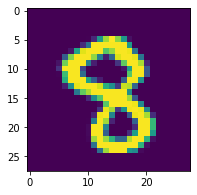

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(3,3))
ax.imshow(X_test_random[0][:,:,0])

Output from the first Conv2D layer filters

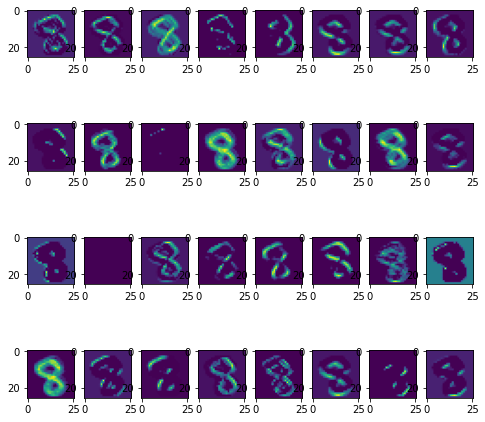

In [ ]:
fig, axes = plt.subplots(4, 8, figsize=(8,8))
for i, ax in enumerate(axes.flat):
    ax.imshow(successive_feature_maps[0][0][:,:,i])

Output from the second Conv2D layer filters

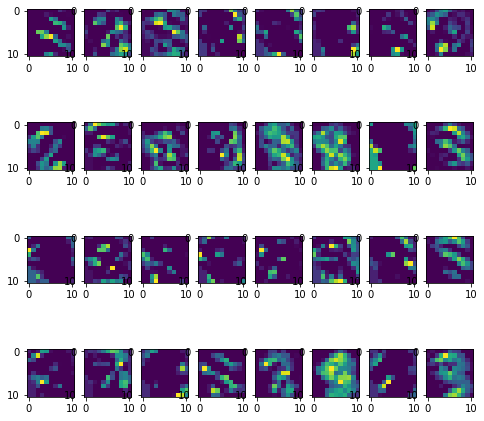

In [ ]:
fig, axes = plt.subplots(4, 8, figsize=(8, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(successive_feature_maps[3][0][:,:,i])

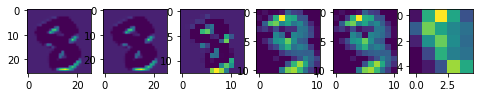

In [ ]:
fig, ax = plt.subplots(1, 6, figsize=(8, 8))  
ax.flat[0].imshow(successive_feature_maps[0][0][:,:,i]) #conv2d
ax.flat[1].imshow(successive_feature_maps[1][0][:,:,i]) #batchnorm
ax.flat[2].imshow(successive_feature_maps[2][0][:,:,i]) #pooling
ax.flat[3].imshow(successive_feature_maps[3][0][:,:,i]) #conv2d
ax.flat[4].imshow(successive_feature_maps[4][0][:,:,i]) #batchnorm
ax.flat[5].imshow(successive_feature_maps[5][0][:,:,i]) #pooling